In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import polars as pl

In [99]:
df = pd.read_csv("stuff_games.csv", low_memory=False)
run_values = pd.read_csv("run_values.csv")

In [4]:
print(df.columns.tolist())

['PitchNo', 'Date', 'Time', 'PAofInning', 'PitchofPA', 'Pitcher', 'PitcherId', 'PitcherThrows', 'PitcherTeam', 'Batter', 'BatterId', 'BatterSide', 'BatterTeam', 'PitcherSet', 'Inning', 'Top/Bottom', 'Outs', 'Balls', 'Strikes', 'TaggedPitchType', 'AutoPitchType', 'PitchCall', 'KorBB', 'TaggedHitType', 'PlayResult', 'OutsOnPlay', 'RunsScored', 'Notes', 'RelSpeed', 'VertRelAngle', 'HorzRelAngle', 'SpinRate', 'SpinAxis', 'Tilt', 'RelHeight', 'RelSide', 'Extension', 'VertBreak', 'InducedVertBreak', 'HorzBreak', 'PlateLocHeight', 'PlateLocSide', 'ZoneSpeed', 'VertApprAngle', 'HorzApprAngle', 'ZoneTime', 'ExitSpeed', 'Angle', 'Direction', 'HitSpinRate', 'PositionAt110X', 'PositionAt110Y', 'PositionAt110Z', 'Distance', 'LastTrackedDistance', 'Bearing', 'HangTime', 'pfxx', 'pfxz', 'x0', 'y0', 'z0', 'vx0', 'vy0', 'vz0', 'ax0', 'ay0', 'az0', 'HomeTeam', 'AwayTeam', 'Stadium', 'Level', 'League', 'GameID', 'PitchUID', 'EffectiveVelo', 'MaxHeight', 'MeasuredDuration', 'SpeedDrop', 'PitchLastMeasured

In [5]:
df['AwayTeam'].unique()

array(['ILL_ILL', 'MIC_WOL', 'IOW_HAW', 'MIC_SPA', 'MIN_GOL', 'PEN_NIT',
       'NEB', 'MAR_TER', 'PUR_BOI', 'NOR_CAT', 'OSU_BUC', 'RUT_SCA', 'IU',
       'WMI_BRO', 'MIC_PRA', 'WOF_TER', 'WCC', 'KAN_JAY', 'OAK_GOL',
       'WIU_LEA', 'PUR_FOR', 'NOT_IRI', 'EMU_EAG', 'CEN_MIC', 'FLO_SEM',
       'VCU_RAM', 'EVA_ACE', 'Michigan State', 'NIA_EAG'], dtype=object)

In [6]:
df['HomeTeam'].unique()

array(['IU', 'PEN_NIT', 'PUR_BOI', 'MIC_WOL', 'IOW_HAW', 'ILL_ILL',
       'NOR_CAT', 'RUT_SCA', 'MIN_GOL', 'NEB', 'OSU_BUC', 'MIC_SPA',
       'WMI_BRO', 'MIC_PRA', 'COL_CHA', 'NOT_IRI', 'MAR_TER', 'GEO_BUL',
       'Maryland', 'LAN_LUG'], dtype=object)

In [7]:
clean_list = ['PitchNo', 'Date', 'PAofInning', 'PitchofPA', 'Pitcher', 'PitcherId', 'PitcherThrows', 'PitcherTeam', 'Batter', 'BatterSide', 'BatterTeam', 'PitcherSet', 'Inning', 'Top/Bottom', 'Outs', 'Balls', 'Strikes', 'TaggedPitchType', 'AutoPitchType', 'PitchCall', 'KorBB', 'TaggedHitType', 'PlayResult', 'OutsOnPlay', 'RunsScored', 'RelSpeed', 'VertRelAngle', 'HorzRelAngle', 'SpinRate', 'SpinAxis', 'Tilt', 'RelHeight', 'RelSide', 'Extension', 'VertBreak', 'InducedVertBreak', 'HorzBreak', 'PlateLocHeight', 'PlateLocSide', 'ZoneSpeed', 'VertApprAngle', 'HorzApprAngle', 'ZoneTime', 'ExitSpeed', 'HomeTeam', 'AwayTeam', 'Level', 'League', 'GameID', 'EffectiveVelo', 'MaxHeight', 'MeasuredDuration', 'SpeedDrop', 'Catcher', 'CatcherId', 'CatcherThrows', 'CatcherTeam', 'PlayID', 'x0', 'z0']
df = df[clean_list]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79817 entries, 0 to 79816
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PitchNo           79817 non-null  int64  
 1   Date              79817 non-null  object 
 2   PAofInning        79792 non-null  float64
 3   PitchofPA         79792 non-null  float64
 4   Pitcher           79813 non-null  object 
 5   PitcherId         78809 non-null  object 
 6   PitcherThrows     79817 non-null  object 
 7   PitcherTeam       79817 non-null  object 
 8   Batter            79817 non-null  object 
 9   BatterSide        79817 non-null  object 
 10  BatterTeam        79817 non-null  object 
 11  PitcherSet        79817 non-null  object 
 12  Inning            79817 non-null  int64  
 13  Top/Bottom        79817 non-null  object 
 14  Outs              79817 non-null  int64  
 15  Balls             79817 non-null  int64  
 16  Strikes           79817 non-null  int64 

In [9]:
df['Level'].unique()

array(['D1', 'TeamExclusive', 'NCAA D1'], dtype=object)

In [10]:
df = df[df['Level'] != 'TeamExclusive']

In [11]:
df['PlayResult'].unique()

array(['Undefined', 'FieldersChoice', 'Out', 'Error', 'Single',
       'Sacrifice', 'Double', 'StolenBase', 'CaughtStealing', 'HomeRun',
       'Triple', nan], dtype=object)

In [12]:
df['PitchCall'].unique()

array(['BallCalled', 'StrikeCalled', 'InPlay', 'FoulBallNotFieldable',
       'HitByPitch', 'BallinDirt', 'StrikeSwinging', 'FoulBallFieldable',
       'Undefined', 'BallIntentional', 'FoulBall', 'Foul'], dtype=object)

In [13]:
df = df[df['PitchCall'] != 'BallIntentional']
df = df[df['PitchCall'] != 'Undefined']

In [14]:
df = pl.from_pandas(df)
run_values = pl.from_pandas(run_values)
required_columns = ["Date", "PitcherThrows", "HorzBreak", "RelSide", "TaggedPitchType", "PitcherId", "RelSpeed"]
df = df.drop_nulls(required_columns)

In [15]:
df = df.with_columns([
    pl.when(pl.col('PlayResult') == 'Undefined').then(pl.col('KorBB')).otherwise(pl.col('PlayResult')).alias('event')
])

In [16]:
df.select('event').unique().to_series().to_list()

['HomeRun',
 'Walk',
 'Single',
 'FieldersChoice',
 'Sacrifice',
 'StolenBase',
 'CaughtStealing',
 'Double',
 'Undefined',
 'Out',
 'Triple',
 None,
 'Error',
 'Strikeout']

In [17]:
# Define a dictionary to group pitch outcomes together
des_dict = {
    'BallCalled': 'ball',
    'InPlay': 'hit_into_play',
    'StrikeCalled': 'called_strike',
    'FoulBall': 'foul',
    'StrikeSwinging': 'swinging_strike',
    'Swinging Strike (Blocked)': 'swinging_strike',
    'Foul': 'foul',
    'FoulBallFieldable': 'foul',
    'FoulBallNotFieldable': 'foul',
    'HitByPitch': 'hit_by_pitch',
    'BallinDirt': 'ball'
}

# Define a dictionary to group events together
event_dict = {
    'Single': 'single',
    'Walk': 'walk',
    'Strikeout': 'strikeout',
    'Out': 'field_out',
    'Double': 'double',
    'hit_by_pitch': 'hit_by_pitch',
    'HomeRun': 'home_run',
    'FieldersChoice': 'field_out',
    'Error': None,
    'Sacrifice': 'field_out',
    'Triple': 'triple',
    'CaughtStealing': None,
    'Undefined': None,
    None: None,
    'StolenBase': None
}

In [18]:
df = df.with_columns(pl.col("event").replace_strict(event_dict, default=None))
# Join the run values data with the main dataframe based on event type, balls, and strikes
df = df.join(run_values, 
             left_on=['event', 'Balls', 'Strikes'],
             right_on=['event', 'balls', 'strikes'], 
             how='left')

# Replace play descriptions with the grouped outcomes from des_dict
df = df.with_columns(pl.col("PitchCall").replace_strict(des_dict, default=None))

# Join the run values data again based on the play description, balls, and strikes
df = df.join(run_values, 
             left_on=['PitchCall', 'Balls', 'Strikes'],
             right_on=['event', 'balls', 'strikes'], 
             how='left',
             suffix='_des')

# Assign the target column based on the delta run expectation
df = df.with_columns(
    pl.when(pl.col("delta_run_exp").is_null())
    .then(pl.col("delta_run_exp_des"))
    .otherwise(pl.col("delta_run_exp"))
    .alias("target")
)

In [19]:
df.select('TaggedPitchType').unique().to_series().to_list()

['FourSeamFastBall',
 'Splitter',
 'OneSeamFastBall',
 'Curveball',
 'Slider',
 'Other',
 'Undefined',
 'Changeup',
 'Fastball',
 'Four-Seam',
 'Cutter',
 'Knuckleball',
 'TwoSeamFastBall',
 'Sinker',
 'ChangeUp']

In [20]:
df = df.with_columns(
    pl.col("PitcherTeam").str.replace("Michigan State", "MIC_SPA", literal=True)
)
df = df.with_columns(
    pl.col("BatterTeam").str.replace("Michigan State", "MIC_SPA", literal=True)
)
df = df.with_columns(
    pl.col("Pitcher").str.replace("Joseph Dzierwa", "Dzierwa, Joseph", literal=True)
)
df = df.with_columns(
    pl.col("Pitcher").str.replace("Tommy Szczepanski", "Szczepanski, Tommy", literal=True)
)
df = df.with_columns(
    pl.col("Pitcher").str.replace("Logan Pikur", "Pikur, Logan", literal=True)
)
df = df.with_columns(
    pl.col("Pitcher").str.replace("Noah Matheny", "Matheny, Noah", literal=True)
)
df = df.with_columns(
    pl.col('TaggedPitchType').str.replace("FourSeamFastBall", "Fastball", literal=True)
)
df = df.with_columns(
    pl.col('TaggedPitchType').str.replace("Four-Seam", "Fastball", literal=True)
)
df = df.with_columns(
    pl.col('TaggedPitchType').str.replace("Changeup", "ChangeUp", literal=True)
)
df = df.with_columns(
    pl.col('TaggedPitchType').str.replace("OneSeamFastBall", "Sinker", literal=True)
)
df = df.with_columns(
    pl.col("Batter").str.replace("Jack Frank", "Frank, Jack", literal=True)
)
df = df.with_columns(
    pl.col("Batter").str.replace("Sam Thompson", "Thompson, Sam", literal=True)
)
df = df.with_columns(
    pl.col("Batter").str.replace("Randy Seymour", "Seymour, Randy", literal=True)
)
df = df.with_columns(
    pl.col("Batter").str.replace("Landen Lozier", "Lozier, Landen", literal=True)
)
df = df.with_columns(
    pl.col("Batter").str.replace("Dillon Kark", "Kark, Dillon", literal=True)
)
df = df.with_columns(
    pl.col("Batter").str.replace("Christian Williams", "Williams, Christian", literal=True)
)
df = df.with_columns(
    pl.col("Batter").str.replace("Jacob Anderson", "Anderson, Jacob", literal=True)
)
df = df.with_columns(
    pl.col("Batter").str.replace("Nick Williams", "Williams, Niklas", literal=True)
)
df = df.with_columns(
    pl.col("Batter").str.replace("Sam Busch", "Busch, Sam", literal=True)
)
df = df.with_columns(
    pl.col("Batter").str.replace("Ryan Mckay", "McKay, Ryan", literal=True)
)

In [21]:
def feature_engineering(df: pl.DataFrame) -> pl.DataFrame:
    # Extract the year from the Date column
    df = df.with_columns(
        pl.col('Date').str.slice(-4).alias('year')
    )
    # Mirror horizontal break for left-handed pitchers
    df = df.with_columns(
        pl.when(pl.col('PitcherThrows') == 'Left')
        .then(-pl.col('HorzBreak'))
        .otherwise(pl.col('HorzBreak'))
        .alias('HorzBreak')
    )

    # Mirror horizontal release point for left-handed pitchers
    df = df.with_columns(
        pl.when(pl.col('PitcherThrows') == 'Left')
        .then(pl.col('RelSide'))
        .otherwise(-pl.col('RelSide'))
        .alias('RelSide')
    )

    #Define the pitch types to be considered
    pitch_types = ['Sinker', 'FourSeamFastBall', 'Cutter', 'Fastball', 'Four-Seam']

    # Filter the DataFrame to include only the specified pitch types
    df_filtered = df.filter(pl.col('TaggedPitchType').is_in(pitch_types))

    # Group by pitcher_id and year, then aggregate to calculate average speed and usage percentage
    df_agg = df_filtered.group_by(['PitcherId', 'year', 'TaggedPitchType']).agg([
        pl.col('RelSpeed').mean().alias('avg_fastball_speed'),
        pl.col('InducedVertBreak').mean().alias('avg_fastball_ivb'),
        pl.col('HorzBreak').mean().alias('avg_fastball_hb'),
        pl.len().alias('count')
    ])

    # Sort the aggregated data by count and average fastball speed
    df_agg = df_agg.sort(['count', 'avg_fastball_speed'], descending=[True, True])
    df_agg = df_agg.unique(subset=['PitcherId', 'year'], keep='first')

    # Join the aggregated data with the main DataFrame
    df = df.join(df_agg, on=['PitcherId', 'year'])

    # If no fastball, use the fastest pitch for avg_fastball_speed
    df = df.with_columns(
        pl.when(pl.col('avg_fastball_speed').is_null())
        .then(pl.col('RelSpeed').max().over('PitcherId'))
        .otherwise(pl.col('avg_fastball_speed'))
        .alias('avg_fastball_speed')
    )

    # Calculate pitch differentials
    df = df.with_columns(
        (pl.col('RelSpeed') - pl.col('avg_fastball_speed')).abs().alias('speed_diff')
    )

    # Cast the year column to integer type
    df = df.with_columns(
        pl.col('year').cast(pl.Int64)
    )

    return df

df = feature_engineering(df.clone())

In [22]:
df.select('year').unique().to_series().to_list()

[2025, 2023, 2024]

In [23]:
df_train = df.filter(pl.col('year').is_in([2023, 2024]))

# Define the features to be used for training
features = ['RelSpeed',
            'SpinRate',
            'SpinAxis',
            'Extension',
            'InducedVertBreak',
            'HorzBreak',
            'RelSide',
            'RelHeight',
            'speed_diff']

# Define the target variable
target = 'target'

# Drop rows with null values in the specified features and target column
df_train = df_train.drop_nulls(subset=features + [target])

In [24]:
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMRegressor
from sklearn.preprocessing import RobustScaler

# Extract features and target from the training dataframe
X = df_train[features]
y = df_train['target']

# Create a pipeline with RobustScaler and LGBMRegressor
model = make_pipeline(
    RobustScaler(),            # Robust Scaler to scale the features
    LGBMRegressor(
        n_estimators=1000,         # Number of boosting rounds (trees) to be built.
        learning_rate=0.01,        # Step size shrinkage used to prevent overfitting. Smaller values require more boosting rounds.
        num_leaves=31,             # Maximum number of leaves in one tree. Controls the complexity of the model.
        max_depth=-1,              # Maximum depth of the tree. -1 means no limit.
        min_child_samples=20,      # Minimum number of data points required in a leaf. Helps control overfitting.
        subsample=0.8,             # Fraction of data to be used for each boosting round. Helps prevent overfitting.
        colsample_bytree=0.8,      # Fraction of features to be used for each boosting round. Helps prevent overfitting.
        reg_alpha=0.1,             # L1 regularization term on weights. Helps prevent overfitting.
        reg_lambda=0.2,            # L2 regularization term on weights. Helps prevent overfitting.
        random_state=42,           # Seed for reproducibility.
        force_row_wise=True        # Force row-wise (data parallel) computation. Useful for handling large datasets.
    )
)

# Fit the model to the training data
model.fit(X, y)

# # Save the model to a file
#import joblib
#joblib.dump(model, 'model/lgbm_model_2020_2022.joblib')
#print("Model saved to model/lgbm_model_2020_2022.joblib")

[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 60449, number of used features: 9
[LightGBM] [Info] Start training from score 0.011048


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lgbmregressor',
                 LGBMRegressor(colsample_bytree=0.8, force_row_wise=True,
                               learning_rate=0.01, n_estimators=1000,
                               random_state=42, reg_alpha=0.1, reg_lambda=0.2,
                               subsample=0.8))])

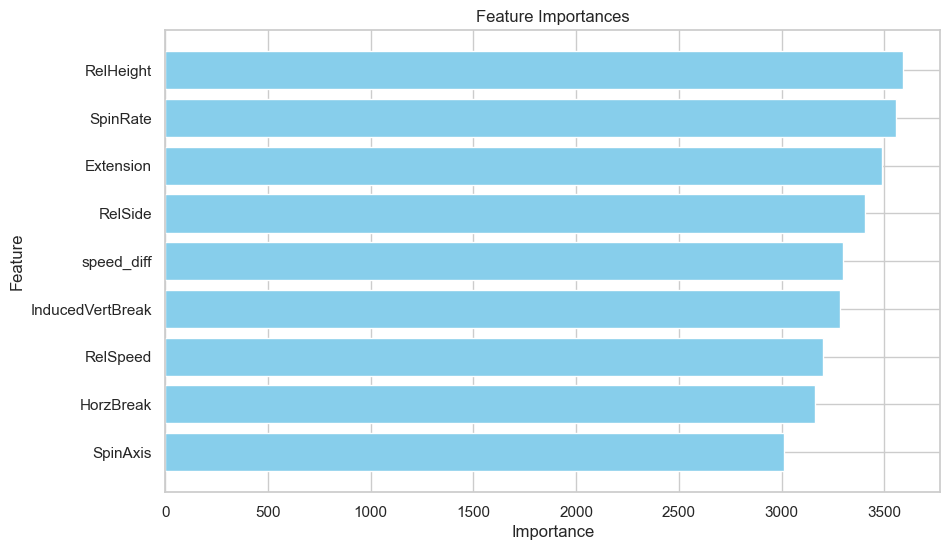

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set_theme(style='whitegrid')

lgbm_model = model.named_steps['lgbmregressor']

# Extract feature importances
feature_importances = lgbm_model.feature_importances_

# Assuming 'features' is a list of feature names
importance_df = pl.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort(by='Importance', descending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [26]:
df_test = df.filter(pl.col('year').is_in([2023, 2024, 2025])).drop_nulls(subset=features + [target])

# Predict the target values for the 2023 data using the trained model
df_test = df_test.with_columns(
    pl.Series(name="target_predict", values=model.predict(df_test[features].to_numpy()))
)
df_test = df_test.with_columns((pl.col("target") - pl.col("target_predict")).alias("RVaX"))

C:\Users\joeyl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [27]:
df_test.head()

PitchNo,Date,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,BatterSide,BatterTeam,PitcherSet,Inning,Top/Bottom,Outs,Balls,Strikes,TaggedPitchType,AutoPitchType,PitchCall,KorBB,TaggedHitType,PlayResult,OutsOnPlay,RunsScored,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,SpinAxis,Tilt,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,PlateLocHeight,PlateLocSide,ZoneSpeed,VertApprAngle,HorzApprAngle,ZoneTime,ExitSpeed,HomeTeam,AwayTeam,Level,League,GameID,EffectiveVelo,MaxHeight,MeasuredDuration,SpeedDrop,Catcher,CatcherId,CatcherThrows,CatcherTeam,PlayID,x0,z0,event,delta_run_exp,delta_run_exp_des,target,year,TaggedPitchType_right,avg_fastball_speed,avg_fastball_ivb,avg_fastball_hb,count,speed_diff,target_predict,RVaX
i64,str,f64,f64,str,str,str,str,str,str,str,str,i64,str,i64,i64,i64,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str,f64,f64,f64,str,str,str,str,str,f64,f64,str,f64,f64,f64,i64,str,f64,f64,f64,u32,f64,f64,f64
1,"""3/22/2024""",1.0,1.0,"""Phillips, Ethan""","""1000115830""","""Right""","""IU""","""Chee-Aloy, Cameron""","""Right""","""ILL_ILL""","""Undefined""",1,"""Top""",0,0,0,"""Sinker""","""Sinker""","""ball""","""Undefined""","""Undefined""","""Undefined""",0.0,0.0,91.14258,0.017481,-3.841442,2295.371905,240.096738,"""2:00""",5.56423,-1.34782,5.66305,-23.12493,11.40363,17.62922,3.65349,-0.77046,81.88873,-4.327607,-0.699323,0.422923,null,"""IU""","""ILL_ILL""","""D1""","""BIG10""","""20240322-Bart Kaufman Field-1""","""89.12374""",null,null,9.25385,"""Stadler, Jake""","""802120""","""Right""","""IU""","""11eab553-b448-41a9-aca0-12182f…",-1.03365,5.5514,null,null,0.034661,0.034661,2024,"""Sinker""",91.145103,10.933931,17.828165,24,0.002523,0.066836,-0.032175
2,"""3/22/2024""",1.0,2.0,"""Phillips, Ethan""","""1000115830""","""Right""","""IU""","""Chee-Aloy, Cameron""","""Right""","""ILL_ILL""","""Undefined""",1,"""Top""",0,1,0,"""Cutter""","""Cutter""","""ball""","""Undefined""","""Undefined""","""Undefined""",0.0,0.0,86.9683,-2.207924,-3.486898,2448.230362,190.078786,"""12:15""",5.56494,-1.31113,6.21593,-21.02399,15.83788,2.59221,1.77065,-1.69459,79.13184,-6.19068,-3.020109,0.436979,null,"""IU""","""ILL_ILL""","""D1""","""BIG10""","""20240322-Bart Kaufman Field-1""","""86.25696""",null,null,7.83647,"""Stadler, Jake""","""802120""","""Right""","""IU""","""e6566d46-7757-4adb-9197-6c0926…",-1.05092,5.38865,null,null,0.059995,0.059995,2024,"""Sinker""",91.145103,10.933931,17.828165,24,4.176803,0.024138,0.035857
3,"""3/22/2024""",1.0,3.0,"""Phillips, Ethan""","""1000115830""","""Right""","""IU""","""Chee-Aloy, Cameron""","""Right""","""ILL_ILL""","""Undefined""",1,"""Top""",0,2,0,"""Sinker""","""Sinker""","""ball""","""Undefined""","""Undefined""","""Undefined""",0.0,0.0,90.09325,-1.721104,-4.475717,2176.487973,228.957415,"""1:45""",5.56226,-1.4497,5.94057,-20.63726,14.41678,15.06572,2.2406,-1.45505,81.06497,-5.635721,-1.779732,0.426128,null,"""IU""","""ILL_ILL""","""D1""","""BIG10""","""20240322-Bart Kaufman Field-1""","""88.45325""",null,null,9.02828,"""Stadler, Jake""","""802120""","""Right""","""IU""","""5b5daa89-9ddb-4ac0-9614-5ef2f4…",-1.10044,5.41318,null,null,0.11041,0.11041,2024,"""Sinker""",91.145103,10.933931,17.828165,24,1.051853,0.021414,0.088996
4,"""3/22/2024""",1.0,4.0,"""Phillips, Ethan""","""1000115830""","""Right""","""IU""","""Chee-Aloy, Cameron""","""Right""","""ILL_ILL""","""Undefined""",1,"""Top""",0,3,0,"""Sinker""","""Sinker""","""called_strike""","""Undefined""","""Undefined""","""Undefined""",0.0,0.0,91.01082,-0.651621,-2.483897,2272.700467,247.291322,"""2:15""",5.53921,-1.34286,5.83685,-24.82116,9.64827,19.95159,2.86455,0.69544,81.6274,-5.317004,1.092403,0.42256,null,"""IU""","""ILL_ILL""","""D1""","""BIG10""","""20240322-Bart Kaufman Field-1""","""89.20019""",null,null,9.38342,"""Stadler, Jake""","""802120""","""Right""","""IU""","""3f349f3f-662c-49d7-8376-a73960…",-1.1516

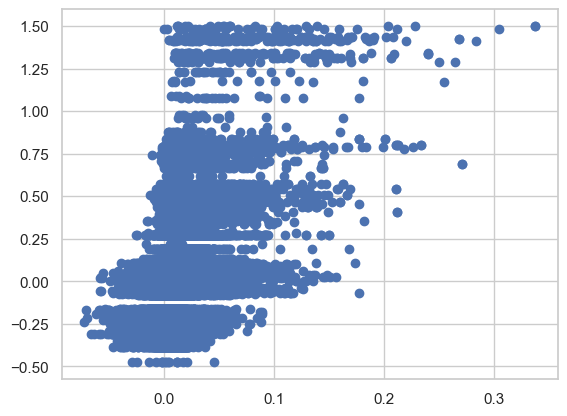

In [28]:
plt.scatter(df_test['target_predict'], df_test['target'])

In [29]:
# Filter the dataframe to include only the rows for the year 2023 and 2024
df_2023 = df_test.filter(pl.col('year') == 2023)
df_2024 = df_test.filter(pl.col('year') == 2024)
df_2025 = df_test.filter(pl.col('year') == 2025)

## 2023 tjStuff+ ##
# Calculate the mean and standard deviation of the target column for 2023
target_mean = df_2023['target_predict'].mean()
target_std = df_2023['target_predict'].std()

# Standardize the target column to create a z-score for 2023
df_2023 = df_2023.with_columns(
    ((pl.col('target_predict') - target_mean) / target_std).alias('target_zscore')
)

# Convert the z-score to stuff_plus for 2023
df_2023 = df_2023.with_columns(
    (100 - (pl.col('target_zscore') * 10)).alias('stuff_plus')
)

# Aggregate stuff_plus by pitcher_id and year for 2023
df_agg_2023 = df_2023.group_by(['PitcherId', 'year']).agg(
    pl.col('stuff_plus').len().alias('count'),
    pl.col('stuff_plus').mean()
)

## 2024 tjStuff+ ##
# Standardize the target column to create a z-score for 2024 using 2023 mean and std
df_2024 = df_2024.with_columns(
    ((pl.col('target_predict') - target_mean) / target_std).alias('target_zscore')
)

# Convert the z-score to tj_stuff_plus for 2024
df_2024 = df_2024.with_columns(
    (100 - (pl.col('target_zscore') * 10)).alias('stuff_plus')
)

# Aggregate tj_stuff_plus by pitcher_id and year for 2024
df_agg_2024 = df_2024.group_by(['Pitcher', 'PitcherTeam', 'year']).agg(
    pl.col('stuff_plus').len().alias('count'),
    pl.col('stuff_plus').mean()
)

target_mean2 = df_2024['target_predict'].mean()
target_std2 = df_2024['target_predict'].std()
## 2025 tjStuff+ ##
# Standardize the target column to create a z-score for 2025 using 2024 mean and std
df_2025 = df_2025.with_columns(
    ((pl.col('target_predict') - target_mean2) / target_std2).alias('target_zscore')
)

# Convert the z-score to tj_stuff_plus for 2024
df_2025 = df_2025.with_columns(
    (100 - (pl.col('target_zscore') * 10)).alias('stuff_plus')
)

# Aggregate tj_stuff_plus by pitcher_id and year for 2024
df_agg_2025 = df_2025.group_by(['Pitcher', 'PitcherTeam', 'year']).agg(
    pl.col('stuff_plus').len().alias('count'),
    pl.col('stuff_plus').mean()
)

In [30]:
## 2023 bigbat ##
# Calculate the mean and standard deviation of the target column for 2023
target_mean = df_2023['RVaX'].mean()
target_std = df_2023['RVaX'].std()

# Standardize the target column to create a z-score for 2023
df_2023 = df_2023.with_columns(
    ((pl.col('RVaX') - target_mean) / target_std).alias('rv_zscore')
)

# Convert the z-score to stuff_plus for 2023
df_2023 = df_2023.with_columns(
    (100 + (pl.col('rv_zscore') * 10)).alias('bigbat_plus')
)

# Aggregate stuff_plus by pitcher_id and year for 2023
df_agg_2023_bat = df_2023.group_by(['Batter', 'year']).agg(
    pl.col('bigbat_plus').len().alias('count'),
    pl.col('bigbat_plus').mean()
)

## 2024 bigbat ##
# Standardize the target column to create a z-score for 2024 using 2023 mean and std
df_2024 = df_2024.with_columns(
    ((pl.col('RVaX') - target_mean) / target_std).alias('rv_zscore')
)

# Convert the z-score to tj_stuff_plus for 2024
df_2024 = df_2024.with_columns(
    (100 + (pl.col('rv_zscore') * 10)).alias('bigbat_plus')
)

# Aggregate tj_stuff_plus by pitcher_id and year for 2024
df_agg_2024_bat = df_2024.group_by(['Batter', 'BatterTeam', 'year']).agg(
    pl.col('bigbat_plus').len().alias('count'),
    pl.col('bigbat_plus').mean()
)

target_mean2 = df_2024['RVaX'].mean()
target_std2 = df_2024['RVaX'].std()
## 2025 bigbat ##
# Standardize the target column to create a z-score for 2025 using 2024 mean and std
df_2025 = df_2025.with_columns(
    ((pl.col('RVaX') - target_mean2) / target_std2).alias('rv_zscore')
)

# Convert the z-score to tj_stuff_plus for 2024
df_2025 = df_2025.with_columns(
    (100 + (pl.col('rv_zscore') * 10)).alias('bigbat_plus')
)

# Aggregate tj_stuff_plus by pitcher_id and year for 2024
df_agg_2025_bat = df_2025.group_by(['Batter', 'BatterTeam', 'year']).agg(
    pl.col('bigbat_plus').len().alias('count'),
    pl.col('bigbat_plus').mean()
)

In [31]:
df_agg_2024

Pitcher,PitcherTeam,year,count,stuff_plus
str,str,i64,u32,f64
"""Cleavinger, Grant""","""NEB""",2024,21,103.134764
"""Hansmann, Max""","""EVA_ACE""",2024,22,107.138373
"""Pikur, Logan""","""MIC_SPA""",2024,453,97.58181
"""Horn, Tyner""","""NEB""",2024,70,100.004617
"""Fieger, Drew""","""EVA_ACE""",2024,4,95.102595
…,…,…,…,…
"""Omans, Cooper""","""ILL_ILL""",2024,363,103.845183
"""Clark, Caleb""","""NEB""",2024,233,98.233869
"""Decker-Petty, Aydan""","""IU""",2024,339,103.991223


In [32]:
df_agg_2024.select('PitcherTeam').unique().to_series().to_list()

['PEN_NIT',
 'GEO_BUL',
 'WMI_BRO',
 'EMU_EAG',
 'Maryland',
 'IU',
 'MIC_SPA',
 'ILL_ILL',
 'WCC',
 'PUR_BOI',
 'CEN_MIC',
 'NOT_IRI',
 'MIN_GOL',
 'OSU_BUC',
 'OAK_GOL',
 'NEB',
 'PUR_FOR',
 'VCU_RAM',
 'RUT_SCA',
 'IOW_HAW',
 'EVA_ACE',
 'NIA_EAG',
 'MAR_TER',
 'NOR_CAT',
 'MIC_WOL',
 'FLO_SEM']

In [33]:
df_msu = df_agg_2024.filter(pl.col('PitcherTeam').is_in(['Michigan State', 'MIC_SPA']))
df_msu = df_msu.sort(pl.col('stuff_plus'), descending=True)
df_msu.to_pandas().head(20)

,Pitcher,PitcherTeam,year,count,stuff_plus
0,"Dzierwa, Joseph",MIC_SPA,2024,1346,102.931694
1,"Mishoulam, Aaron",MIC_SPA,2024,935,101.865758
2,"Powers, Nick",MIC_SPA,2024,1161,101.833177
3,"Matheny, Noah",MIC_SPA,2024,280,99.565580
4,"Cook, Harrison",MIC_SPA,2024,681,99.368667
5,"Szczepanski, Tommy",MIC_SPA,2024,405,98.718513
6,"Pianto, Dominic",MIC_SPA,2024,237,97.743392
7,"Pikur, Logan",MIC_SPA,2024,453,97.581810
8,"Arbaugh, Aidan",MIC_SPA,2024,122,97.100428
9,"Ferazzi, Nick",MIC_SPA,2024,924,96.962387


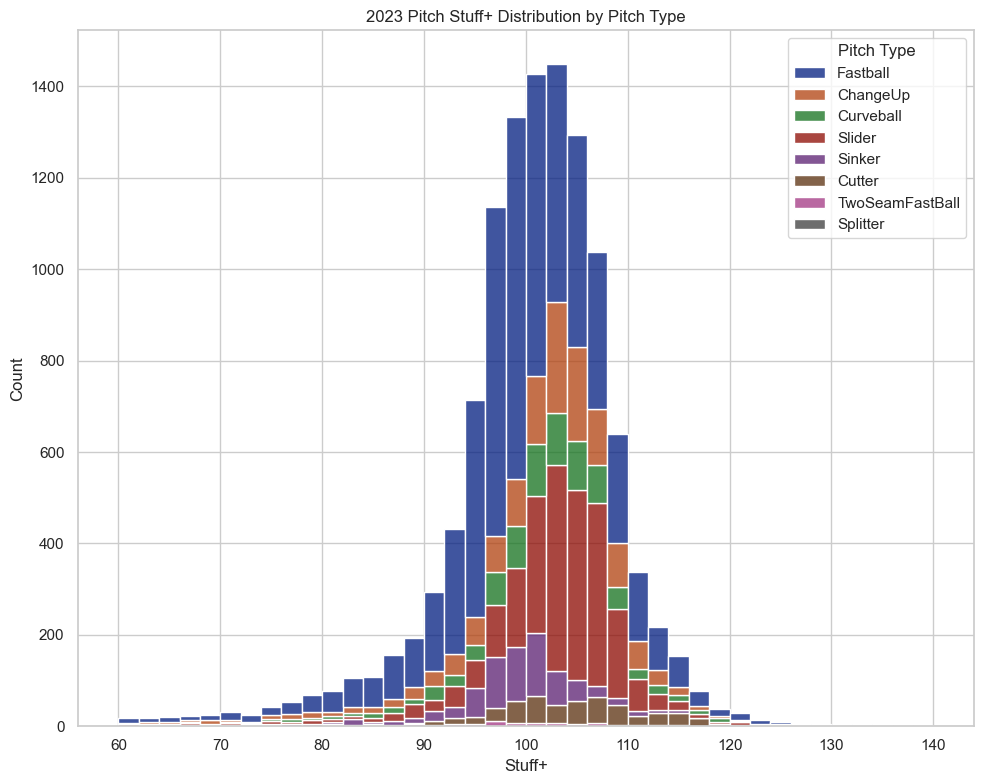

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

df_2023_pd = df_2023.to_pandas()

plt.figure(figsize=(10,8))
ax = sns.histplot(data=df_2023_pd, 
             x='stuff_plus', 
             binrange=[60, 140], 
             bins=40,
             hue='TaggedPitchType',
             multiple='stack',
             palette='dark'
            )

plt.title('2023 Pitch Stuff+ Distribution by Pitch Type')
plt.xlabel('Stuff+')
ax.get_legend().set_title("Pitch Type")  
plt.tight_layout()

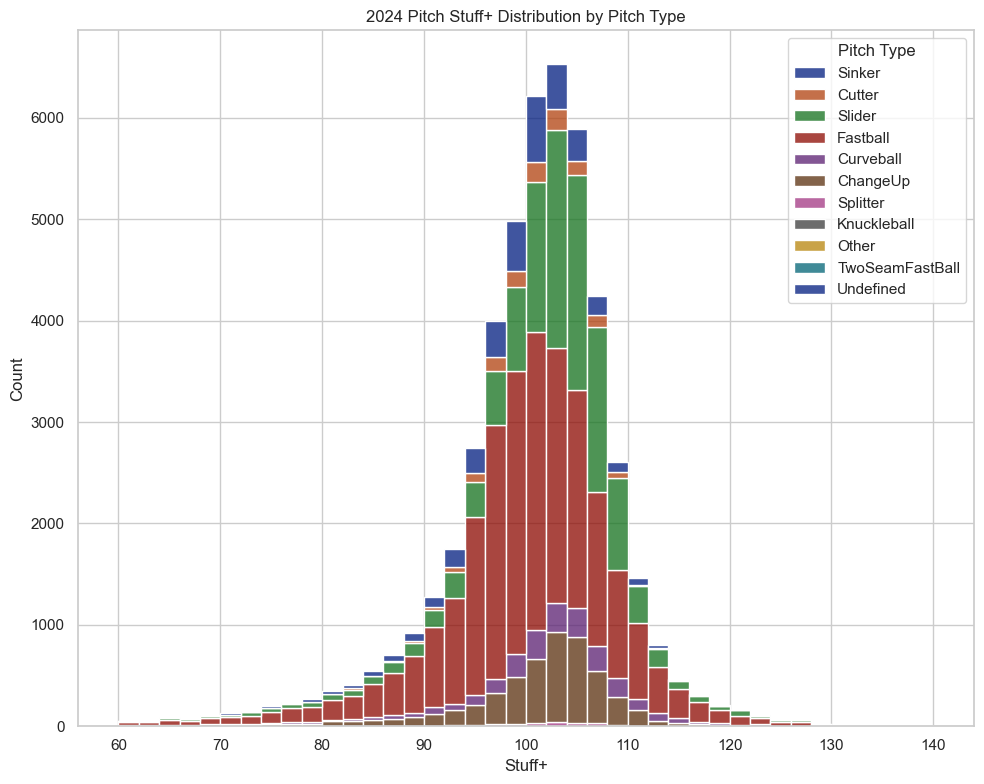

In [35]:
df_2024_pd = df_2024.to_pandas()

plt.figure(figsize=(10,8))
ax = sns.histplot(data=df_2024_pd, 
             x='stuff_plus', 
             binrange=[60, 140], 
             bins=40,
             hue='TaggedPitchType',
             multiple='stack',
             palette='dark'
             )

plt.title('2024 Pitch Stuff+ Distribution by Pitch Type')
plt.xlabel('Stuff+')
ax.get_legend().set_title("Pitch Type")  
plt.tight_layout()

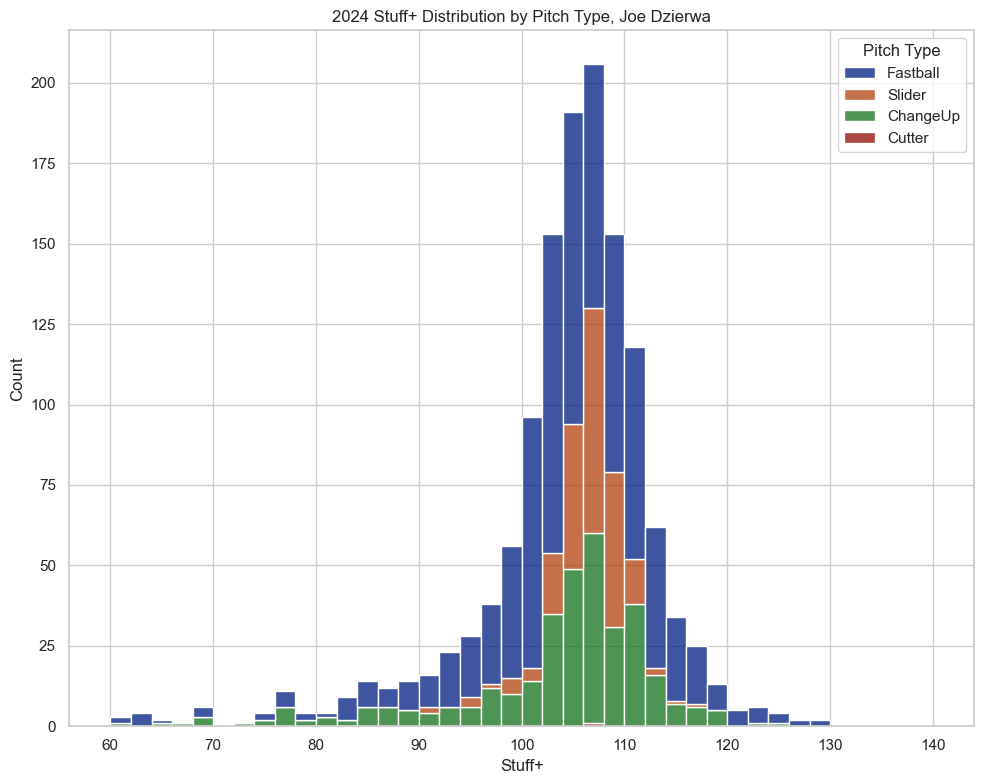

In [36]:
joe_d = df_2024.filter(pl.col('Pitcher').is_in(['Dzierwa, Joseph']))
joe_d_pd = joe_d.to_pandas()
plt.figure(figsize=(10,8))
ax = sns.histplot(data=joe_d_pd, 
             x='stuff_plus', 
             binrange=[60, 140], 
             bins=40,
             hue='TaggedPitchType',
             multiple='stack',
             palette='dark'
             )

plt.title('2024 Stuff+ Distribution by Pitch Type, Joe Dzierwa')
plt.xlabel('Stuff+')
ax.get_legend().set_title("Pitch Type")  
plt.tight_layout()

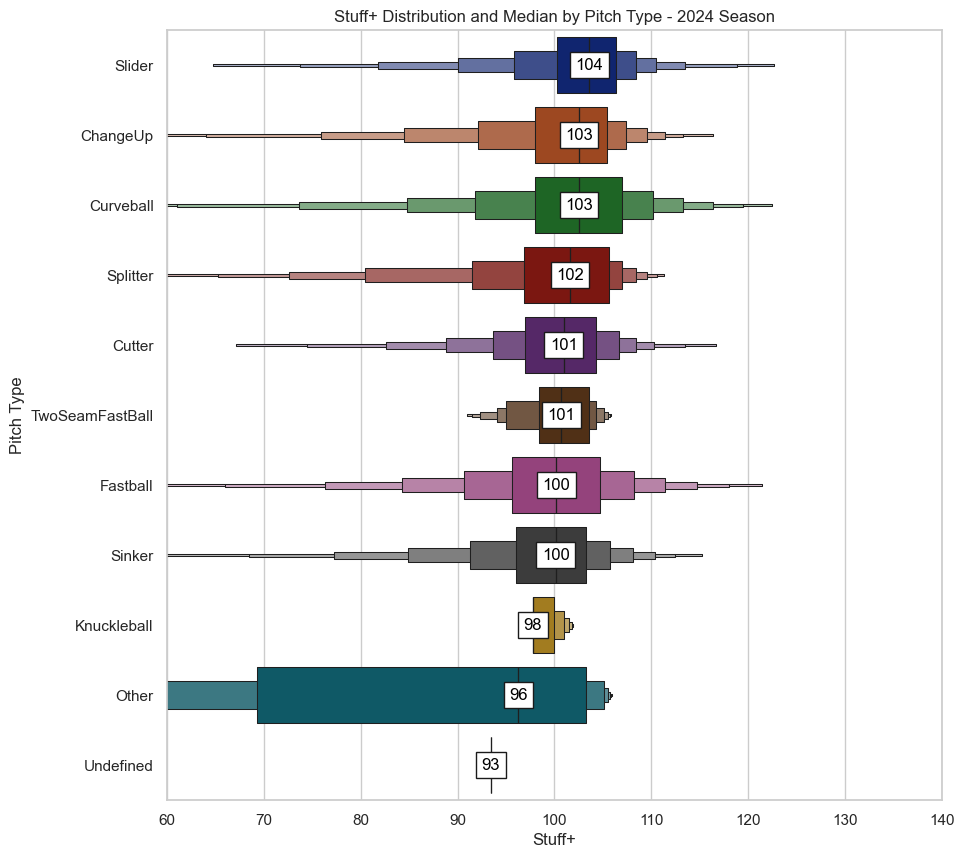

In [37]:
df_2024_pd_group = df_2024_pd.groupby('TaggedPitchType')['stuff_plus'].agg(
    mean='mean',
    std='std',
    median='median',
    min='min',
    max='max',
    percentile_2=lambda x: x.quantile(0.025),
    percentile_98=lambda x: x.quantile(0.975)
).sort_values('mean', ascending=False).reset_index()

# Calculate the median of tj_stuff_plus for each pitch_type
median_values = df_2024_pd.groupby('TaggedPitchType')['stuff_plus'].median().sort_values(ascending=False)

# Map the median values to the dataframe
df_2024_pd['stuff_plus_median'] = df_2024_pd['TaggedPitchType'].map(median_values.to_dict())

# Sort the dataframe by the median values of tj_stuff_plus
df_2024_pd = df_2024_pd.sort_values(by='stuff_plus_median', ascending=False)

# Create a subplot for the boxen plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the boxen plot of tj_stuff_plus for specific pitch types, colored by pitch type
bp = sns.boxenplot(data=df_2024_pd, 
               x='stuff_plus', 
               y='TaggedPitchType',
               palette='dark',
               hue='TaggedPitchType',
               ax=ax,
               showfliers=False,  # Do not show outliers
               k_depth=6          # Number of boxes to draw
               )


# Annotate the median values on the plot
for index, row in median_values.reset_index().iterrows():
    ax.text(row['stuff_plus'], 
            index, 
            f'{row["stuff_plus"]:.0f}', 
            color='black', 
            ha="center", 
            va="center",
            bbox=dict(facecolor='white', alpha=1,edgecolor='k')  # White background for the text
            )

# Set the x-axis limits
ax.set_xlim(60, 140)

# Set the title of the plot
ax.set_title('Stuff+ Distribution and Median by Pitch Type - 2024 Season')

# Set the x-axis and y-axis label
ax.set_xlabel('Stuff+')
ax.set_ylabel('Pitch Type')

# Display the plot
plt.show()

In [38]:
left = ['Ferazzi, Nick', 'Cook, Harrison', 'Mishoulam, Aaron', 'Klann, Robert', 'Powers, Nick', 'Arbaugh, Aidan']
msu_pitchers = list(filter(lambda p: p not in left, df_msu.select('Pitcher').unique().to_series().to_list()))
msu_pitchers

['Szczepanski, Tommy',
 'Higgins, Nolan',
 'Grundman, Gannon',
 'Matheny, Noah',
 'Huffman, Jaxon',
 'Brewer, Garrett',
 'Dzierwa, Joseph',
 'Pianto, Dominic',
 'Moczydlowsky, Gavin',
 'Pikur, Logan']

In [39]:
df_msu25 = df_2025.filter(pl.col('PitcherTeam').is_in(['Michigan State', 'MIC_SPA']))
msu_25pitchers = df_msu25.select('Pitcher').unique().to_series().to_list()
msu_25pitchers

['Donovan, Aidan',
 'Szczepaniak, Ryan',
 'Dzierwa, Joseph',
 'Pikur, Logan',
 'Maxey, Zach']

In [40]:
for pitcher in msu_pitchers:
    data = df_2024.filter(pl.col('Pitcher').is_in([pitcher]))
    data_pd = data.to_pandas()
    plt.figure(figsize=(10,8))
    ax = sns.histplot(data=data_pd, 
                 x='stuff_plus', 
                 binrange=[60, 140], 
                 bins=40,
                 hue='TaggedPitchType',
                 multiple='stack',
                 palette='dark'
                 )

    plt.title(f'2024 Stuff+ Distribution by Pitch Type, {pitcher}')
    plt.xlabel('Stuff+')
    ax.get_legend().set_title("Pitch Type")  
    plt.tight_layout()
    filename = f"{pitcher.replace(' ', '_')}_stuff_plus_distribution.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.close()

In [41]:
results = []
for pitcher in msu_pitchers:
    data = df_2024.filter(pl.col('Pitcher').is_in([pitcher]))
    pitches = data.select('TaggedPitchType').unique().to_series().to_list()
    for pitch in pitches:
        pitch_data = data.filter(pl.col('TaggedPitchType') == pitch)
        avg_value = pitch_data['stuff_plus'].mean()
        pitch_count = pitch_data['stuff_plus'].len()
        results.append({'Pitcher': pitcher, 'Pitch': pitch, 'Count': pitch_count, 'Average Stuff+': avg_value})

df_results = pd.DataFrame(results)

print(df_results.to_string(index=False))

            Pitcher     Pitch  Count  Average Stuff+
 Szczepanski, Tommy  Fastball    204       94.029860
 Szczepanski, Tommy    Slider    192      103.636487
 Szczepanski, Tommy  ChangeUp      9      100.077870
     Higgins, Nolan  ChangeUp     13       94.122352
     Higgins, Nolan    Slider    198       97.551773
     Higgins, Nolan Curveball     44       95.738476
     Higgins, Nolan  Fastball    376       91.774845
   Grundman, Gannon  Fastball     64       93.296368
   Grundman, Gannon    Sinker     11       89.590575
   Grundman, Gannon  ChangeUp     25       93.002944
   Grundman, Gannon    Slider     37      103.687939
      Matheny, Noah    Slider      5       99.160140
      Matheny, Noah Curveball     52       98.174819
      Matheny, Noah  Fastball    219      100.102089
      Matheny, Noah  ChangeUp      4       88.778361
     Huffman, Jaxon  Fastball     99       94.903378
     Huffman, Jaxon    Slider     14      101.198123
    Brewer, Garrett Curveball      5      104.

In [42]:
results = []

for pitcher in msu_pitchers:
    data = df_2024.filter(pl.col('Pitcher') == pitcher)  # Filter data for the pitcher
    pitches = data.select('TaggedPitchType').unique().to_series().to_list()  # Get unique pitch types
    
    for pitch in pitches:
        pitch_data = data.filter(pl.col('TaggedPitchType') == pitch)  # Filter data for pitch type
        pitch_count = pitch_data.height  # Get total count of the pitch
        
        if pitch_count < 15:
            continue
        stuff_plus_sorted = pitch_data.sort("stuff_plus")
        lower_20 = stuff_plus_sorted.slice(0, int(0.2 * pitch_count))
        middle_60 = stuff_plus_sorted.slice(int(0.2 * pitch_count), int(0.6 * pitch_count))
        upper_20 = stuff_plus_sorted.slice(int(0.8 * pitch_count), pitch_count - int(0.8 * pitch_count))

        avg_spinrate_lower = lower_20["SpinRate"].mean()
        avg_spinrate_middle = middle_60["SpinRate"].mean()
        avg_spinrate_upper = upper_20["SpinRate"].mean()

        avg_extension_lower = lower_20["Extension"].mean()
        avg_extension_middle = middle_60["Extension"].mean()
        avg_extension_upper = upper_20["Extension"].mean()
        
        avg_height_lower = lower_20["RelHeight"].mean()
        avg_height_middle = middle_60["RelHeight"].mean()
        avg_height_upper = upper_20["RelHeight"].mean()

        avg_vert_lower = lower_20["InducedVertBreak"].mean()
        avg_vert_middle = middle_60["InducedVertBreak"].mean()
        avg_vert_upper = upper_20["InducedVertBreak"].mean()

        avg_side_lower = lower_20["RelSide"].mean()
        avg_side_middle = middle_60["RelSide"].mean()
        avg_side_upper = upper_20["RelSide"].mean()

        avg_diff_lower = lower_20["speed_diff"].mean()
        avg_diff_middle = middle_60["speed_diff"].mean()
        avg_diff_upper = upper_20["speed_diff"].mean()

        avg_speed_lower = lower_20["RelSpeed"].mean()
        avg_speed_middle = middle_60["RelSpeed"].mean()
        avg_speed_upper = upper_20["RelSpeed"].mean()

        avg_horz_lower = lower_20["HorzBreak"].mean()
        avg_horz_middle = middle_60["HorzBreak"].mean()
        avg_horz_upper = upper_20["HorzBreak"].mean()
        
        results.append({
            'Pitcher': pitcher, 
            'Pitch': pitch, 
            'Count': pitch_count, 
            'Bottom 20% Spin Rate': avg_spinrate_lower, 
            'Middle 60% Spin Rate': avg_spinrate_middle, 
            'Top 20% Spin Rate': avg_spinrate_upper,
            'Bottom 20% Extension': avg_extension_lower, 
            'Middle 60% Extension': avg_extension_middle, 
            'Top 20% Extension': avg_extension_upper,
            'Bottom 20% Rel Height': avg_height_lower, 
            'Middle 60% Rel Height': avg_height_middle, 
            'Top 20% Rel Height': avg_height_upper,
            'Bottom 20% IVB': avg_vert_lower, 
            'Middle 60% IVB': avg_vert_middle, 
            'Top 20% IVB': avg_vert_upper,
            'Bottom 20% Rel Side': avg_side_lower, 
            'Middle 60% Rel Side': avg_side_middle, 
            'Top 20% Rel Side': avg_side_upper,
            'Bottom 20% Speed Diff': avg_diff_lower, 
            'Middle 60% Speed Diff': avg_diff_middle, 
            'Top 20% Speed Diff': avg_diff_upper,
            'Bottom 20% Speed': avg_speed_lower, 
            'Middle 60% Speed': avg_speed_middle, 
            'Top 20% Speed': avg_speed_upper,
            'Bottom 20% Horz Break': avg_horz_lower, 
            'Middle 60% Horz Break': avg_horz_middle, 
            'Top 20% Horz Break': avg_horz_upper,
        })

# Convert to Pandas DataFrame for display
df_results = pd.DataFrame(results)

df_rotated = df_results.set_index(['Pitcher', 'Pitch']).transpose()
df_rotated.to_excel("msu_pitching_data.xlsx")

In [43]:
data = df_2024.filter(pl.col('Pitcher').is_in(msu_pitchers))
data.sort("stuff_plus", descending=True).head(6)

PitchNo,Date,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,BatterSide,BatterTeam,PitcherSet,Inning,Top/Bottom,Outs,Balls,Strikes,TaggedPitchType,AutoPitchType,PitchCall,KorBB,TaggedHitType,PlayResult,OutsOnPlay,RunsScored,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,SpinAxis,Tilt,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,…,VertApprAngle,HorzApprAngle,ZoneTime,ExitSpeed,HomeTeam,AwayTeam,Level,League,GameID,EffectiveVelo,MaxHeight,MeasuredDuration,SpeedDrop,Catcher,CatcherId,CatcherThrows,CatcherTeam,PlayID,x0,z0,event,delta_run_exp,delta_run_exp_des,target,year,TaggedPitchType_right,avg_fastball_speed,avg_fastball_ivb,avg_fastball_hb,count,speed_diff,target_predict,RVaX,target_zscore,stuff_plus,rv_zscore,bigbat_plus
i64,str,f64,f64,str,str,str,str,str,str,str,str,i64,str,i64,i64,i64,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,str,str,str,str,str,str,f64,f64,f64,str,str,str,str,str,f64,f64,str,f64,f64,f64,i64,str,f64,f64,f64,u32,f64,f64,f64,f64,f64,f64,f64
28,"""5/10/2024""",5.0,5.0,"""Dzierwa, Joseph""","""804530""","""Left""","""MIC_SPA""","""Mezzenga, Ike""","""Left""","""MIN_GOL""","""Undefined""",1,"""Bottom""",2,2,2,"""Fastball""","""Sinker""","""hit_into_play""","""Undefined""","""GroundBall""","""Out""",1.0,0.0,89.75083,-1.900606,5.444092,2546.527419,116.865516,"""10:00""",5.67973,-2.77301,6.18871,-22.54777,12.53611,22.14541,…,-6.177646,1.468347,0.42631,102.50527,"""MIN_GOL""","""MIC_SPA""","""D1""","""BIG10""","""20240510-SiebertField-1""","""88.41561""",1.82698,null,9.04725,"""Thompson, Sam""","""1000054122""","""Right""","""MIC_SPA""","""f2d2af7d-dbfb-43f4-ac9f-47e8fc…",2.37232,5.52451,"""field_out""",-0.215713,null,-0.215713,2024,"""Fastball""",89.440436,13.507297,20.67245,720,0.310394,-0.042273,-0.17344,-2.911473,129.114725,-0.826238,91.737621
28,"""5/10/2024""",5.0,5.0,"""Dzierwa, Joseph""","""804530""","""Left""","""MIC_SPA""","""Mezzenga, Ike""","""Left""","""MIN_GOL""","""Undefined""",1,"""Bottom""",2,2,2,"""Fastball""","""Sinker""","""hit_into_play""","""Undefined""","""GroundBall""","""Out""",1.0,0.0,89.75083,-1.900606,5.444092,2546.527419,116.865516,"""10:00""",5.67973,-2.77301,6.18871,-22.54777,12.53611,22.14541,…,-6.177646,1.468347,0.42631,102.50527,"""MIN_GOL""","""MIC_SPA""","""D1""","""BIG10""","""20240510-SiebertField-1""","""88.41561""",1.82698,null,9.04725,"""Thompson, Sam""","""1000054122""","""Right""","""MIC_SPA""","""f2d2af7d-dbfb-43f4-ac9f-47e8fc…",2.37232,5.52451,"""field_out""",-0.215713,null,-0.215713,2024,"""Fastball""",89.440436,13.507297,20.67245,720,0.310394,-0.042273,-0.17344,-2.911473,129.114725,-0.826238,91.737621
48,"""3/15/2024""",1.0,5.0,"""Dzierwa, Joseph""","""804530""","""Left""","""MIC_SPA""","""Taubert, Harrison""","""Right""","""EVA_ACE""","""Undefined""",2,"""Top""",0,2,2,"""Fastball""","""Sinker""","""swinging_strike""","""Strikeout""","""Undefined""","""Undefined""",0.0,0.0,92.30507,-0.561714,3.933956,2550.016451,114.915642,"""9:45""",5.7895,-2.30659,5.94699,-22.87108,10.13729,19.41851,…,-4.853741,0.454008,0.413507,null,"""MIC_SPA""","""EVA_ACE""","""D1""","""BIG10""","""20240315-MichiganState-1""","""91.15301""",null,null,8.5567,"""Thompson, Sam""","""1000054122""","""Right""","""MIC_SPA""","""330a763f-38e1-4164-bc87-9e5b36…",2.0031,5.73186,"""strikeout""",-0.226139,null,-0.226139,2024,"""Fastball""",89.440436,13.507297,20.67245,720,2.864634,-0.038691,-0.187448,-2.715857,127.158567,-0.893214,91.067856
68,"""3/15/2024""",2.0,3.0,"""Dzierwa, Joseph""","""804530""","""Left""","""MIC_SPA""","""Peart, BJ (Brodie)""","""Right""","""EVA_ACE""","""Undefined""",3,"""Top""",1,0,2,"""Fastball""","""Sinker""","""foul""","""Undefined""","""Undefined""","""Undefined""",0.0,0.0,92.22286,-1.431688,2.934126,2530.062641,117.079853,"""10:00""",5.73489,-2.26929,6.19347,-19.41324,13.63761,24.27993,…,-5.138229,-1.445024,0.413774,77.74364,"""MIC_SPA""","""EVA_ACE""","""D1""","""BIG10""","""20240

In [44]:
for pitcher in msu_25pitchers:
    data = df_2025.filter(pl.col('Pitcher').is_in([pitcher]))
    data_pd = data.to_pandas()
    plt.figure(figsize=(10,8))
    ax = sns.histplot(data=data_pd, 
                 x='stuff_plus', 
                 binrange=[60, 140], 
                 bins=40,
                 hue='TaggedPitchType',
                 multiple='stack',
                 palette='dark'
                 )

    plt.title(f'2025 Stuff+ Distribution by Pitch Type, {pitcher}')
    plt.xlabel('Stuff+')
    ax.get_legend().set_title("Pitch Type")  
    plt.tight_layout()
    filename = f"{pitcher.replace(' ', '_')}_stuff_plus_distribution 2025.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.close()

In [45]:
results = []
for pitcher in msu_25pitchers:
    data = df_2025.filter(pl.col('Pitcher').is_in([pitcher]))
    pitches = data.select('TaggedPitchType').unique().to_series().to_list()
    for pitch in pitches:
        pitch_data = data.filter(pl.col('TaggedPitchType') == pitch)
        avg_value = pitch_data['stuff_plus'].mean()
        pitch_count = pitch_data['stuff_plus'].len()
        results.append({'Pitcher': pitcher, 'Pitch': pitch, 'Count': pitch_count, 'Average Stuff+': avg_value})

df_results = pd.DataFrame(results)

print(df_results.to_string(index=False))

          Pitcher     Pitch  Count  Average Stuff+
   Donovan, Aidan    Slider     23       97.701758
   Donovan, Aidan  Fastball     35       90.662145
   Donovan, Aidan  ChangeUp      3       92.802631
   Donovan, Aidan Curveball      9       75.385281
Szczepaniak, Ryan  Fastball     32       99.606535
Szczepaniak, Ryan Curveball     16       99.826281
Szczepaniak, Ryan    Slider      4      100.449771
  Dzierwa, Joseph  ChangeUp     12      104.839101
  Dzierwa, Joseph    Slider      7      102.539983
  Dzierwa, Joseph  Fastball     40      109.297063
  Dzierwa, Joseph    Cutter      2      104.122081
     Pikur, Logan  ChangeUp      1      100.666688
     Pikur, Logan    Slider      4       98.777749
     Pikur, Logan    Sinker      7      100.654853
      Maxey, Zach  ChangeUp     20       93.923596
      Maxey, Zach  Fastball     11       93.188449
      Maxey, Zach Curveball     12      100.372874


In [46]:
results = []

for pitcher in msu_25pitchers:
    data = df_2025.filter(pl.col('Pitcher') == pitcher)  # Filter data for the pitcher
    pitches = data.select('TaggedPitchType').unique().to_series().to_list()  # Get unique pitch types
    
    for pitch in pitches:
        pitch_data = data.filter(pl.col('TaggedPitchType') == pitch)  # Filter data for pitch type
        pitch_count = pitch_data.height  # Get total count of the pitch
        
        if pitch_count < 10:
            continue
        stuff_plus_sorted = pitch_data.sort("stuff_plus")
        lower_20 = stuff_plus_sorted.slice(0, int(0.2 * pitch_count))
        middle_60 = stuff_plus_sorted.slice(int(0.2 * pitch_count), int(0.6 * pitch_count))
        upper_20 = stuff_plus_sorted.slice(int(0.8 * pitch_count), pitch_count - int(0.8 * pitch_count))

        avg_spinrate_lower = lower_20["SpinRate"].mean()
        avg_spinrate_middle = middle_60["SpinRate"].mean()
        avg_spinrate_upper = upper_20["SpinRate"].mean()

        avg_extension_lower = lower_20["Extension"].mean()
        avg_extension_middle = middle_60["Extension"].mean()
        avg_extension_upper = upper_20["Extension"].mean()
        
        avg_height_lower = lower_20["RelHeight"].mean()
        avg_height_middle = middle_60["RelHeight"].mean()
        avg_height_upper = upper_20["RelHeight"].mean()

        avg_vert_lower = lower_20["InducedVertBreak"].mean()
        avg_vert_middle = middle_60["InducedVertBreak"].mean()
        avg_vert_upper = upper_20["InducedVertBreak"].mean()

        avg_side_lower = lower_20["RelSide"].mean()
        avg_side_middle = middle_60["RelSide"].mean()
        avg_side_upper = upper_20["RelSide"].mean()

        avg_diff_lower = lower_20["speed_diff"].mean()
        avg_diff_middle = middle_60["speed_diff"].mean()
        avg_diff_upper = upper_20["speed_diff"].mean()

        avg_speed_lower = lower_20["RelSpeed"].mean()
        avg_speed_middle = middle_60["RelSpeed"].mean()
        avg_speed_upper = upper_20["RelSpeed"].mean()

        avg_horz_lower = lower_20["HorzBreak"].mean()
        avg_horz_middle = middle_60["HorzBreak"].mean()
        avg_horz_upper = upper_20["HorzBreak"].mean()
        
        results.append({
            'Pitcher': pitcher, 
            'Pitch': pitch, 
            'Count': pitch_count, 
            'Bottom 20% Spin Rate': avg_spinrate_lower, 
            'Middle 60% Spin Rate': avg_spinrate_middle, 
            'Top 20% Spin Rate': avg_spinrate_upper,
            'Bottom 20% Extension': avg_extension_lower, 
            'Middle 60% Extension': avg_extension_middle, 
            'Top 20% Extension': avg_extension_upper,
            'Bottom 20% Rel Height': avg_height_lower, 
            'Middle 60% Rel Height': avg_height_middle, 
            'Top 20% Rel Height': avg_height_upper,
            'Bottom 20% IVB': avg_vert_lower, 
            'Middle 60% IVB': avg_vert_middle, 
            'Top 20% IVB': avg_vert_upper,
            'Bottom 20% Rel Side': avg_side_lower, 
            'Middle 60% Rel Side': avg_side_middle, 
            'Top 20% Rel Side': avg_side_upper,
            'Bottom 20% Speed Diff': avg_diff_lower, 
            'Middle 60% Speed Diff': avg_diff_middle, 
            'Top 20% Speed Diff': avg_diff_upper,
            'Bottom 20% Speed': avg_speed_lower, 
            'Middle 60% Speed': avg_speed_middle, 
            'Top 20% Speed': avg_speed_upper,
            'Bottom 20% Horz Break': avg_horz_lower, 
            'Middle 60% Horz Break': avg_horz_middle, 
            'Top 20% Horz Break': avg_horz_upper,
        })

# Convert to Pandas DataFrame for display
df_results = pd.DataFrame(results)

df_rotated = df_results.set_index(['Pitcher', 'Pitch']).transpose()
df_rotated.to_excel("msu_pitching_data.xlsx")

In [47]:
data = df_2025.filter(pl.col('BatterTeam').is_in(['MIC_SPA']))
data.sort("RVaX", descending=True).head(6)

PitchNo,Date,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,BatterSide,BatterTeam,PitcherSet,Inning,Top/Bottom,Outs,Balls,Strikes,TaggedPitchType,AutoPitchType,PitchCall,KorBB,TaggedHitType,PlayResult,OutsOnPlay,RunsScored,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,SpinAxis,Tilt,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,…,VertApprAngle,HorzApprAngle,ZoneTime,ExitSpeed,HomeTeam,AwayTeam,Level,League,GameID,EffectiveVelo,MaxHeight,MeasuredDuration,SpeedDrop,Catcher,CatcherId,CatcherThrows,CatcherTeam,PlayID,x0,z0,event,delta_run_exp,delta_run_exp_des,target,year,TaggedPitchType_right,avg_fastball_speed,avg_fastball_ivb,avg_fastball_hb,count,speed_diff,target_predict,RVaX,target_zscore,stuff_plus,rv_zscore,bigbat_plus
i64,str,f64,f64,str,str,str,str,str,str,str,str,i64,str,i64,i64,i64,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,str,str,str,str,str,str,f64,f64,f64,str,str,str,str,str,f64,f64,str,f64,f64,f64,i64,str,f64,f64,f64,u32,f64,f64,f64,f64,f64,f64,f64
40,"""2/14/2025""",2.0,2.0,"""Wizceb, Joey""","""1000310118""","""Left""","""WMI_BRO""","""Picot, Parker""","""Right""","""MIC_SPA""","""Undefined""",2,"""Top""",1,1,0,"""Fastball""","""Changeup""","""hit_into_play""","""Undefined""","""FlyBall""","""Triple""",0.0,0.0,79.60531,-0.105629,4.910665,2072.200965,105.55422,"""9:30""",5.18667,-2.90916,6.05205,-36.83557,8.15434,22.99194,…,-7.005567,0.786631,0.482757,102.096,"""WMI_BRO""","""MIC_SPA""","""D1""","""BIG10""","""20250214-USABBCary3-2""","""78.07739""",89.90587,null,8.27868,"""Pena, Diego""","""1000189123""","""Right""","""WMI_BRO""","""f57c9885-ebb9-450f-9cf0-10d206…",2.53873,5.15891,"""triple""",0.958031,null,0.958031,2025,"""Fastball""",79.445998,14.732287,21.50163,20,0.159312,0.025191,0.93284,0.727671,92.723289,4.479575,144.79575
191,"""2/14/2025""",5.0,5.0,"""Lehmann, Adam""","""1000136808""","""Right""","""WMI_BRO""","""Seymour, Randy""","""Right""","""MIC_SPA""","""Undefined""",6,"""Top""",0,2,2,"""Slider""","""Slider""","""hit_into_play""","""Undefined""","""GroundBall""","""Single""",0.0,2.0,80.21239,-0.431059,-2.406868,2235.740517,79.314326,"""8:45""",5.63566,-1.34895,6.62861,-42.28672,0.73559,-4.41583,…,-8.348441,-3.210595,0.472083,67.61838,"""WMI_BRO""","""MIC_SPA""","""D1""","""BIG10""","""20250214-USABBCary3-2""","""79.84285""",3.06355,null,7.63973,"""Pena, Diego""","""1000189123""","""Right""","""WMI_BRO""","""f5834f22-f1ff-4020-9c9e-d1eff0…",-1.18423,5.58955,"""single""",0.506305,null,0.506305,2025,"""Fastball""",87.408313,21.509261,5.78852,40,7.195923,0.001133,0.505172,-0.509277,105.092769,2.425523,124.255229
11,"""2/14/2025""",3.0,5.0,"""Wizceb, Joey""","""1000310118""","""Left""","""WMI_BRO""","""McKay, Ryan""","""Left""","""MIC_SPA""","""Undefined""",1,"""Top""",1,2,2,"""Slider""","""Curveball""","""hit_into_play""","""Undefined""","""GroundBall""","""Single""",0.0,0.0,73.07465,1.315964,3.710039,1702.997062,208.375727,"""1:00""",5.32794,-2.37531,6.18185,-49.06672,4.07646,-1.10492,…,-7.838812,3.908779,0.524681,97.01149,"""WMI_BRO""","""MIC_SPA""","""D1""","""BIG10""","""20250214-USABBCary3-2""","""71.8388""",4.64596,null,7.39419,"""Pena, Diego""","""1000189123""","""Right""","""WMI_BRO""","""273959d4-9706-41c4-9496-f65ac8…",2.0943,5.40333,"""single""",0.506305,null,0.506305,2025,"""Fastball""",79.445998,14.732287,21.50163,20,6.371347,0.015076,0.491229,0.207638,97.92362,2.358553,123.585534
341,"""2/14/2025""",5.0,5.0,"""Hinds, Aiden""","""1000090972""","""Right""","""WMI_BRO""","""Bright, Noah""","""Right""","""MIC_SPA""","""Undefined""",9,"""Top""",2,2,2,"""Fastball""","""Four-Seam""","""hit_into_play""","""Undefined""","""LineDrive""","""Single""",0.0,2.0,87.3461,-1.144063,-3.000029,2025.03119,213.946234,"""1:15""",5.55117,-1.97403,5.37609,-21.37706,16.90249,10.36646,…,-5.189124,-1.160375,0.445302,79.47225,"""WMI_BRO""","""MIC_SPA""","""D1""","""BIG10""","""20250214-USABBCary3-2""","""84.64464""",11.21

In [48]:
msu_bats25 = df_2025.filter(pl.col('BatterTeam').is_in(['Michigan State', 'MIC_SPA']))
msu_25bats = msu_bats25.select('Batter').unique().to_series().to_list()
msu_25bats

['McKay, Ryan',
 'Sokolove, JT',
 'Anderson, Jacob',
 'Picot, Parker',
 'Bright, Noah',
 'Berry, Caleb',
 'Williams, Nicklas',
 'Dresselhouse, Jake',
 'Shannon, Will',
 'Seymour, Randy',
 'Busch, Sam',
 'Sturgess, Isaac',
 'Williams, Christian']

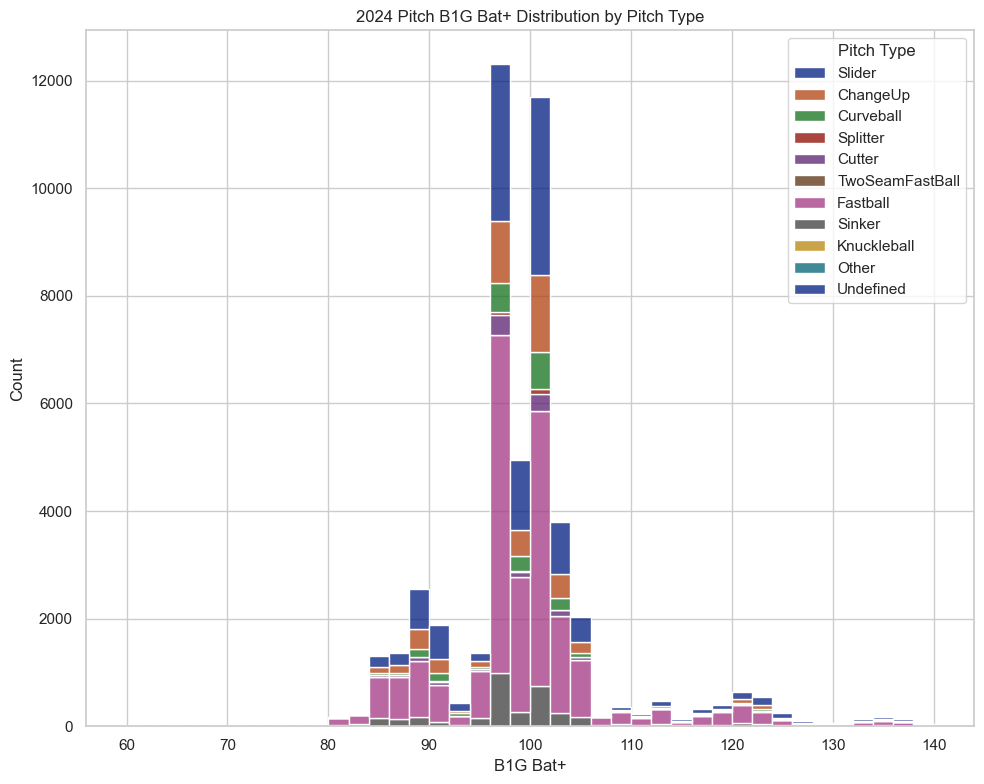

In [49]:
plt.figure(figsize=(10,8))
ax = sns.histplot(data=df_2024_pd, 
             x='bigbat_plus', 
             binrange=[60, 140], 
             bins=40,
             hue='TaggedPitchType',
             multiple='stack',
             palette='dark'
             )

plt.title('2024 Pitch B1G Bat+ Distribution by Pitch Type')
plt.xlabel('B1G Bat+')
ax.get_legend().set_title("Pitch Type")  
plt.tight_layout()

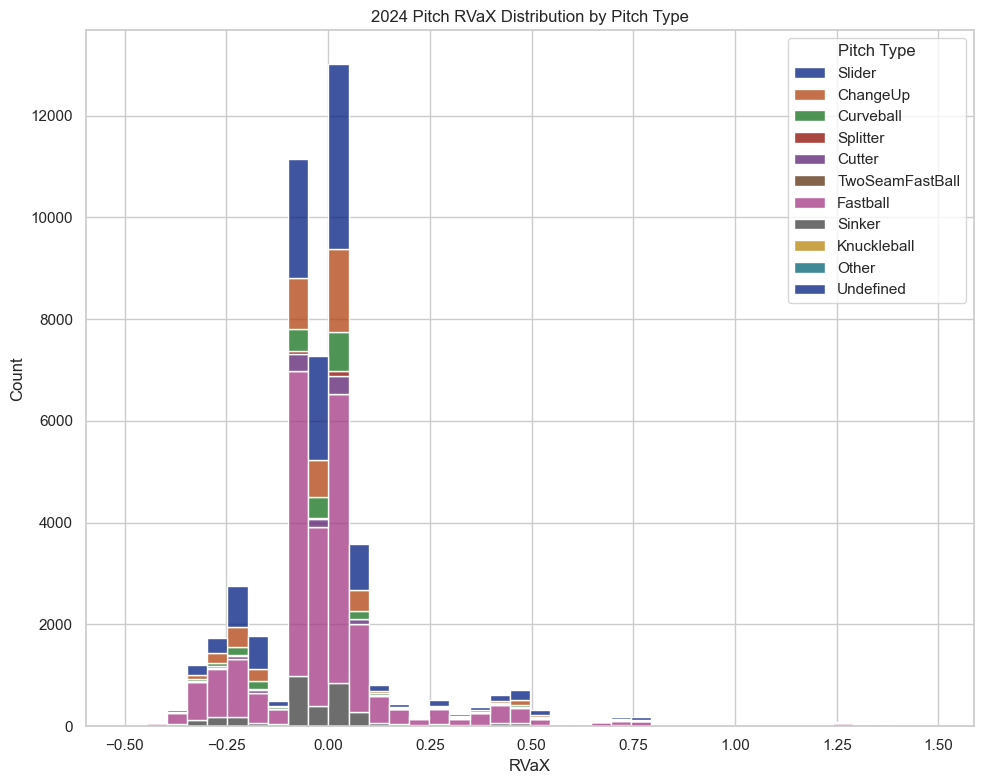

In [50]:
plt.figure(figsize=(10,8))
ax = sns.histplot(data=df_2024_pd, 
             x='RVaX',  
             bins=40,
             hue='TaggedPitchType',
             multiple='stack',
             palette='dark'
             )

plt.title('2024 Pitch RVaX Distribution by Pitch Type')
plt.xlabel('RVaX')
ax.get_legend().set_title("Pitch Type")  
plt.tight_layout()

In [51]:
df_msu_bat = df_agg_2024_bat.filter(pl.col('BatterTeam').is_in(['Michigan State', 'MIC_SPA']))
df_msu_bat = df_msu_bat.sort(pl.col('bigbat_plus'), descending=True)
df_msu_bat.to_pandas().head(80)

,Batter,BatterTeam,year,count,bigbat_plus
0,"Frank, Jack",MIC_SPA,2024,997,100.921276
1,"Ziegler, Greg",MIC_SPA,2024,561,100.906810
2,"Terres, Jayden",MIC_SPA,2024,31,100.638111
3,"Holloway, Jayden",MIC_SPA,2024,20,100.487080
4,"Williams, Nicklas",MIC_SPA,2024,913,100.478969
5,"Thompson, Sam",MIC_SPA,2024,577,100.079384
6,"Kark, Dillon",MIC_SPA,2024,882,100.039430
7,"Bright, Noah",MIC_SPA,2024,386,99.975522
8,"Lozier, Landen",MIC_SPA,2024,455,99.975450
9,"McKay, Ryan",MIC_SPA,2024,819,99.797276


In [52]:
df_msu25 = df_2025.filter(pl.col('BatterTeam').is_in(['Michigan State', 'MIC_SPA']))
msu_25bats = df_msu25.select('Batter').unique().to_series().to_list()
msu_25bats

['McKay, Ryan',
 'Berry, Caleb',
 'Busch, Sam',
 'Bright, Noah',
 'Williams, Nicklas',
 'Picot, Parker',
 'Dresselhouse, Jake',
 'Williams, Christian',
 'Sokolove, JT',
 'Seymour, Randy',
 'Sturgess, Isaac',
 'Anderson, Jacob',
 'Shannon, Will']

In [53]:
for batter in msu_25bats:
    data = df_2025.filter(pl.col('Batter').is_in([batter]))
    data_pd = data.to_pandas()
    plt.figure(figsize=(10,8))
    ax = sns.histplot(data=data_pd, 
                 x='bigbat_plus', 
                 binrange=[60, 140], 
                 bins=40,
                 hue='TaggedPitchType',
                 multiple='stack',
                 palette='dark'
                 )

    plt.title(f'2025 B1G Bat+ Distribution by Pitch Type, {batter}')
    plt.xlabel('B1G Bat+')
    ax.get_legend().set_title("Pitch Type")  
    plt.tight_layout()
    filename = f"{batter.replace(' ', '_')}_bigbat_plus_distribution 2025.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.close()

In [54]:
results = []
for batter in msu_25bats:
    data = df_2025.filter(pl.col('Batter').is_in([batter]))
    pitches = data.select('TaggedPitchType').unique().to_series().to_list()
    for pitch in pitches:
        pitch_data = data.filter(pl.col('TaggedPitchType') == pitch)
        avg_value = pitch_data['bigbat_plus'].mean()
        pitch_count = pitch_data['bigbat_plus'].len()
        results.append({'Batter': batter, 'Pitch': pitch, 'Count': pitch_count, 'Average B1G Bat+': avg_value})

df_results = pd.DataFrame(results)

print(df_results.to_string(index=False))

             Batter     Pitch  Count  Average B1G Bat+
        McKay, Ryan    Slider      2        109.753733
        McKay, Ryan    Sinker      1         88.674571
        McKay, Ryan Curveball      2        102.199951
        McKay, Ryan  Fastball     18         99.584958
        McKay, Ryan  ChangeUp      9         96.101659
       Berry, Caleb  Fastball      2         96.111340
       Berry, Caleb    Slider      3         92.887135
         Busch, Sam  ChangeUp      9         99.304929
         Busch, Sam    Sinker      2         99.376795
         Busch, Sam Curveball      1        103.893898
         Busch, Sam  Fastball      8        100.386076
       Bright, Noah  Fastball     14        101.459157
       Bright, Noah    Sinker      3        103.021561
       Bright, Noah  ChangeUp      2        110.215856
  Williams, Nicklas  ChangeUp      6         99.745103
  Williams, Nicklas    Slider      5         99.735755
  Williams, Nicklas  Fastball     21         97.087470
  Williams

In [55]:
df_msu_bat = df_agg_2025_bat.filter(pl.col('BatterTeam').is_in(['Michigan State', 'MIC_SPA']))
df_msu_bat = df_msu_bat.sort(pl.col('bigbat_plus'), descending=True)
df_msu_bat.to_pandas().head(80)

,Batter,BatterTeam,year,count,bigbat_plus
0,"Bright, Noah",MIC_SPA,2025,19,102.627611
1,"Sokolove, JT",MIC_SPA,2025,23,100.119691
2,"Busch, Sam",MIC_SPA,2025,20,99.974023
3,"Seymour, Randy",MIC_SPA,2025,28,99.952945
4,"Sturgess, Isaac",MIC_SPA,2025,7,99.619153
5,"Picot, Parker",MIC_SPA,2025,27,99.468216
6,"McKay, Ryan",MIC_SPA,2025,32,99.063316
7,"Williams, Nicklas",MIC_SPA,2025,33,98.062816
8,"Williams, Christian",MIC_SPA,2025,21,97.793586
9,"Shannon, Will",MIC_SPA,2025,5,97.023578


In [56]:
for batter in msu_25bats:
    data = df_2025.filter(pl.col('Batter').is_in([batter]))
    data_pd = data.to_pandas()
    plt.figure(figsize=(10,8))
    ax = sns.histplot(data=data_pd, 
                 x='RVaX', 
                 binrange=[-1, 1], 
                 bins=40,
                 hue='TaggedPitchType',
                 multiple='stack',
                 palette='dark'
                 )

    plt.title(f'2025 RVaX Distribution by Pitch Type, {batter}')
    plt.xlabel('RVaX')
    ax.get_legend().set_title("Pitch Type")  
    plt.tight_layout()
    filename = f"{batter.replace(' ', '_')}_RVaX_distribution 2025.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.close()

In [57]:
data = df_2025.filter(pl.col('BatterTeam').is_in(['MIC_SPA']))
data = data.sort("RVaX", descending=True).head(6)
data = data.select(['Batter', 'Inning', 'Top/Bottom', 'Outs', 'Balls', 'Strikes', 'TaggedPitchType', 'PitchCall', 'PlayResult', 'target_predict', 'target', 'stuff_plus', 'RVaX', 'bigbat_plus'])
data.to_pandas().head(6)

,Batter,Inning,Top/Bottom,Outs,Balls,Strikes,TaggedPitchType,PitchCall,PlayResult,target_predict,target,stuff_plus,RVaX,bigbat_plus
0,"Picot, Parker",2,Top,1,1,0,Fastball,hit_into_play,Triple,0.025191,0.958031,92.723289,0.932840,144.795750
1,"Seymour, Randy",6,Top,0,2,2,Slider,hit_into_play,Single,0.001133,0.506305,105.092769,0.505172,124.255229
2,"McKay, Ryan",1,Top,1,2,2,Slider,hit_into_play,Single,0.015076,0.506305,97.923620,0.491229,123.585534
3,"Bright, Noah",9,Top,2,2,2,Fastball,hit_into_play,Single,0.018298,0.506305,96.267096,0.488007,123.430792
4,"Seymour, Randy",2,Bottom,1,1,2,Fastball,hit_by_pitch,Undefined,0.021242,0.453555,94.753655,0.432313,120.755871
5,"Bright, Noah",5,Top,1,1,0,ChangeUp,hit_into_play,Single,0.018657,0.437409,96.082448,0.418752,120.104536


In [58]:
data = df_2025.filter(
    (pl.col('BatterTeam').is_in(['MIC_SPA'])) & 
    (pl.col('PitchCall') != 'hit_into_play') &
    (pl.col('PitchCall') != 'hit_by_pitch')
)
data = data.sort("RVaX", descending=True).head(10)
data = data.select(['Batter', 'Inning', 'Top/Bottom', 'Outs', 'Balls', 'Strikes', 'TaggedPitchType', 'PitchCall', 'PlayResult', 'target_predict', 'target', 'stuff_plus', 'RVaX', 'bigbat_plus'])
data.to_pandas().head(10)

,Batter,Inning,Top/Bottom,Outs,Balls,Strikes,TaggedPitchType,PitchCall,PlayResult,target_predict,target,stuff_plus,RVaX,bigbat_plus
0,"Williams, Nicklas",6,Top,0,3,2,ChangeUp,ball,Undefined,0.009405,0.270801,100.839851,0.261397,112.546923
1,"Williams, Nicklas",7,Top,0,3,2,Fastball,ball,Undefined,0.033667,0.270801,88.365393,0.237135,111.381640
2,"McKay, Ryan",6,Top,0,3,1,Fastball,ball,Undefined,0.000628,0.190958,105.352456,0.190330,109.133670
3,"Bright, Noah",6,Top,2,3,1,Fastball,ball,Undefined,0.006723,0.190958,102.218379,0.184235,108.840905
4,"McKay, Ryan",7,Top,0,3,1,Fastball,ball,Undefined,0.029292,0.190958,90.614600,0.161666,107.756955
5,"Williams, Christian",6,Top,0,3,1,Fastball,ball,Undefined,0.040918,0.190958,84.637222,0.150041,107.198587
6,"Williams, Christian",5,Bottom,2,2,0,Fastball,ball,Undefined,-0.027938,0.110410,120.039916,0.138349,106.637037
7,"Bright, Noah",8,Top,1,3,0,Sinker,ball,Undefined,0.010654,0.131460,100.197644,0.120807,105.794518
8,"Picot, Parker",9,Top,2,3,0,Fastball,ball,Undefined,0.016293,0.131460,97.297957,0.115167,105.523648
9,"Sturgess, Isaac",9,Top,0,3,0,Fastball,ball,Undefined,0.019327,0.131460,95.738235,0.112134,105.377949


In [86]:
results = []
data = df_2025.with_columns((pl.col("Balls").cast(pl.Utf8) + "-" + pl.col("Strikes").cast(pl.Utf8)).alias("count"))
data = data.filter(pl.col('Batter').is_in(msu_25bats))
counts = data.select('count').unique().to_series().to_list()
for count in counts:
    pitch_data = data.filter(pl.col('count') == count)
    avg_value = pitch_data['bigbat_plus'].mean()
    pitch_count = pitch_data['bigbat_plus'].len()
    ball_count = pitch_data.filter(pl.col("PitchCall") == "ball").height
    strike_called_count = pitch_data.filter(pl.col("PitchCall") == "called_strike").height
    strike_swinging_count = pitch_data.filter(pl.col("PitchCall") == "swinging_strike").height
    hits_count = pitch_data.filter(pl.col("PlayResult").is_in(["Single", "Double", "Triple", "Home Run"])).height
    field_outs = pitch_data.filter(pl.col("event").is_in(["field_out"])).height
    results.append({
        'Count': count, 
        'Pitch Count': pitch_count, 
        'Average B1G Bat+': avg_value, 
        'Balls Taken': ball_count, 
        'Called Strikes': strike_called_count, 
        'Strikes Swinging': strike_swinging_count, 
        'Hits': hits_count,
        'Field Outs': field_outs
    })

df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))

Count  Pitch Count  Average B1G Bat+  Balls Taken  Called Strikes  Strikes Swinging  Hits  Field Outs
  3-2           12         96.442536            2               1                 3     1           1
  1-0           40        100.590387           17               5                 2     4           6
  1-2           17         99.668152            9               0                 2     0           1
  2-1           13         97.998335            6               2                 1     0           2
  2-2           15        102.439363            4               0                 1     3           5
  3-1           10         97.400199            4               0                 1     0           2
  1-1           25         94.781546            6               4                 3     0           8
  2-0           17        100.789600           10               4                 2     0           0
  0-0           66         99.209480           42              16                 